In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
# nation_position, club_position, player_positions
df = pd.read_csv('players_22.csv', low_memory=False)

# selecting column
df = df[['short_name', 'age', 'nationality_name', 'overall', 'potential', 'club_name', 'value_eur', 'wage_eur', 'player_positions']]

# selecting only one position
df['player_positions'] = df['player_positions'].str.split(',', expand=True)[0]

# dropping nan
df.dropna(inplace=True)

In [3]:
df

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
...,...,...,...,...,...,...,...,...,...
19234,Song Defu,22,China PR,47,52,Wuhan FC,70000.0,1000.0,CDM
19235,C. Porter,19,Republic of Ireland,47,59,Derry City,110000.0,500.0,CM
19236,N. Logue,21,Republic of Ireland,47,55,Finn Harps,100000.0,500.0,CM
19237,L. Rudden,19,Republic of Ireland,47,60,Finn Harps,110000.0,500.0,ST


In [4]:
players_missing_worldcup = ['K. Benzema', 'S. Mané', 'S. Agüero', 'Sergio Ramos', 'P. Pogba', 'M. Reus', 'Diogo Jota', 'A. Harit', 'N. Kanté', 'G. Lo Celso', 'Piqué']

# dropping injured players
drop_index = df[df['short_name'].isin(players_missing_worldcup)].index
df.drop(drop_index, axis=0, inplace=True)

In [5]:
teams_worldcup = [
    'Qatar', 'Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Spain', 'Portugal',
    'Mexico', 'Netherlands', 'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'United States', 'Croatia',
    'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia',
    'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Australia'
]

# filtering only national teams in the world cup
df = df[df['nationality_name'].isin(teams_worldcup)]


In [6]:
df

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
...,...,...,...,...,...,...,...,...,...
19183,F. Emmings,17,United States,48,73,Minnesota United FC,130000.0,500.0,GK
19197,J. Neal,17,United States,48,69,LA Galaxy,140000.0,500.0,CB
19216,H. Wiles-Richards,19,England,48,65,Bristol City,110000.0,1000.0,GK
19217,J. Affonso,23,Uruguay,48,55,Cerro Largo Fútbol Club,90000.0,500.0,CM


In [7]:
# best players
df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)


/var/folders/sf/m15m45k51xnb6tqcgjhz2qb00000gn/T/ipykernel_7723/761477272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)


In [8]:
df

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
6,K. Mbappé,22,France,91,95,Paris Saint-Germain,194000000.0,230000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
...,...,...,...,...,...,...,...,...,...
19183,F. Emmings,17,United States,48,73,Minnesota United FC,130000.0,500.0,GK
19197,J. Neal,17,United States,48,69,LA Galaxy,140000.0,500.0,CB
19216,H. Wiles-Richards,19,England,48,65,Bristol City,110000.0,1000.0,GK
19217,J. Affonso,23,Uruguay,48,55,Cerro Largo Fútbol Club,90000.0,500.0,CM


In [9]:
#Distribution of players overall

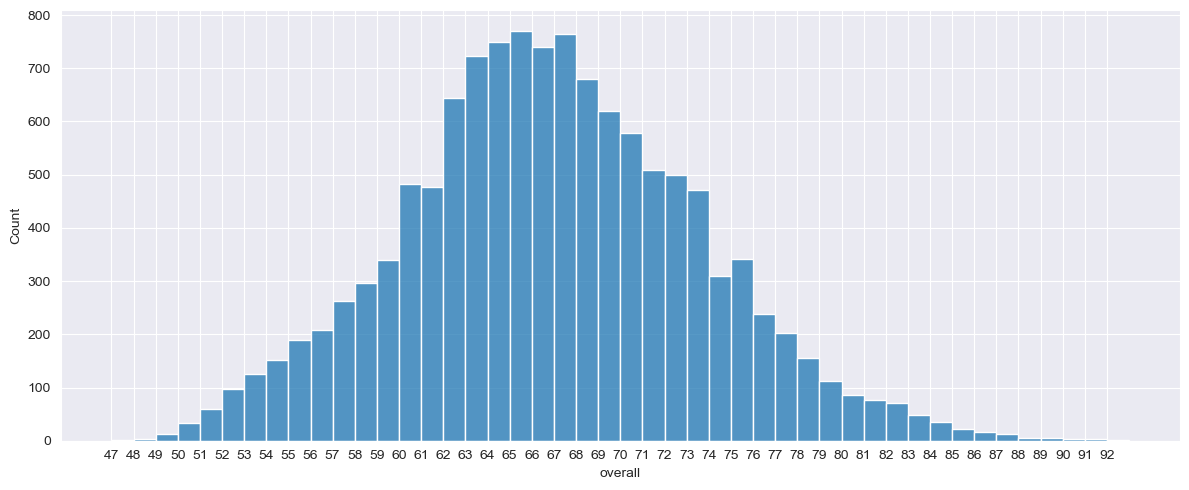

In [10]:
import numpy as np
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.histplot(df, x='overall', 
              binwidth=1)

bins = np.arange(df['overall'].min(), df['overall'].max(), 1)
plt.xticks(bins)
plt.show()

In [11]:

df.drop_duplicates('player_positions')


,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK
19,J. Kimmich,26,Germany,89,90,FC Bayern München,108000000.0,160000.0,CDM
15,V. van Dijk,29,Netherlands,89,89,Liverpool,86000000.0,230000.0,CB
28,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000.0,CAM
44,T. Alexander-Arnold,22,England,87,92,Liverpool,114000000.0,150000.0,RB
45,J. Sancho,21,England,87,91,Manchester United,116500000.0,150000.0,RM


In [12]:
def best_squad(nationality):
    df_best_squad = df.copy()
    df_best_squad = df_best_squad.groupby(['nationality_name', 'player_positions']).head(2)
    df_best_squad = df_best_squad[df_best_squad['nationality_name']==nationality].sort_values(['player_positions', 'overall', 'potential'], ascending=False)
    return df_best_squad


In [13]:
best_squad('Brazil')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
191,Gabriel Jesus,24,Brazil,83,87,Manchester City,52500000.0,150000.0,ST
268,Richarlison,24,Brazil,82,87,Everton,46500000.0,100000.0,ST
5069,Paolinho Leima,21,Brazil,70,70,Clube Atlético Mineiro,1700000.0,12000.0,RWB
8031,Jadenilson Baia,33,Brazil,67,67,Sport Club Corinthians Paulista,525000.0,9000.0,RWB
662,Antony,21,Brazil,79,88,Ajax,39500000.0,17000.0,RW
656,Rodrygo,20,Brazil,79,88,Real Madrid CF,38500000.0,115000.0,RW
271,Raphinha,24,Brazil,82,87,Leeds United,46000000.0,89000.0,RM
318,Lucas Moura,28,Brazil,81,81,Tottenham Hotspur,26000000.0,105000.0,RM
311,Danilo,29,Brazil,81,81,Juventus,22500000.0,83000.0,RB
484,Maikel Catarino,25,Brazil,80,80,Sport Club Corinthians Paulista,21000000.0,33000.0,RB


In [14]:
average_overall = [best_squad(team)['overall'].mean() for team in teams_worldcup]

df_average_overall = pd.DataFrame({'Teams': teams_worldcup, 'AVG_Overall': average_overall})
df_average_overall = df_average_overall.dropna()
df_average_overall = df_average_overall.sort_values('AVG_Overall', ascending=False)
df_average_overall

,Teams,AVG_Overall
6,Spain,82.400000
7,Portugal,81.733333
5,England,81.700000
1,Brazil,81.666667
3,France,81.000000
4,Argentina,80.566667
11,Germany,80.433333
2,Belgium,79.034483
9,Netherlands,78.758621
8,Mexico,77.727273


In [15]:
def best_lineup(nationality, lineup):
    lineup_count = [lineup.count(i) for i in lineup]

    df_lineup = pd.DataFrame({'position': lineup, 'count': lineup_count})
    positions_non_repeated = df_lineup[df_lineup['count'] <= 1]['position'].values
    positions_repeated = df_lineup[df_lineup['count'] > 1]['position'].values

    df_squad = best_squad(nationality)

    df_lineup = pd.concat([
        df_squad[df_squad['player_positions'].isin(positions_non_repeated)].drop_duplicates('player_positions', keep='first'),
        df_squad[df_squad['player_positions'].isin(positions_repeated)]]
    )
    return df_lineup[['short_name', 'overall', 'club_name', 'player_positions']]

In [16]:
dict_formation = {
    '4-3-3': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW'],
    '4-4-2': ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST'],
    '4-2-3-1': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST'],
}

In [17]:
for index, row in df_average_overall[:32].iterrows():
    max_average = None
    for key, values in dict_formation.items():
        average = best_lineup(row['Teams'], values)['overall'].mean()
        if max_average is None or average>max_average:
            max_average = average
            formation = key
    print(row['Teams'], formation, max_average)

Spain 4-2-3-1 85.1
Portugal 4-2-3-1 84.9
England 4-4-2 84.45454545454545
Brazil 4-3-3 84.81818181818181
France 4-2-3-1 83.9
Argentina 4-3-3 83.54545454545455
Germany 4-2-3-1 84.1
Belgium 4-3-3 82.54545454545455
Netherlands 4-4-2 82.54545454545455
Mexico 4-3-3 78.6
Croatia 4-4-2 79.54545454545455
Uruguay 4-4-2 80.72727272727273
Serbia 4-3-3 77.81818181818181
Morocco 4-3-3 79.54545454545455
Denmark 4-2-3-1 78.8
Senegal 4-2-3-1 79.0
Switzerland 4-4-2 78.54545454545455
Japan 4-2-3-1 75.1
United States 4-3-3 76.18181818181819
Poland 4-4-2 78.18181818181819
Ghana 4-4-2 75.54545454545455
Cameroon 4-3-3 74.8
Ecuador 4-2-3-1 73.1
Wales 4-4-2 73.9090909090909
Costa Rica 4-2-3-1 74.83333333333333
Australia 4-4-2 72.72727272727273
Iran 4-4-2 72.375
Canada 4-2-3-1 74.25
Tunisia 4-3-3 71.0
Saudi Arabia 4-4-2 70.9090909090909


In [21]:
best_lineup('Brazil', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
191,Gabriel Jesus,83,Manchester City,ST
311,Danilo,81,Juventus,RB
153,Alex Sandro,83,Juventus,LB
18,Ederson,89,Manchester City,GK
14,Casemiro,89,Real Madrid CF,CDM
61,Fabinho,86,Liverpool,CDM
39,Marquinhos,87,Paris Saint-Germain,CB
71,Thiago Silva,85,Chelsea,CB
189,Ronaldo Cabrais,83,Grêmio,CAM
210,Oscar,82,Shanghai Port FC,CAM
